<a href="https://colab.research.google.com/github/Radu1999/Regression-algorithms/blob/main/Tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset retrieval

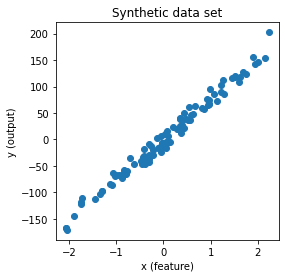

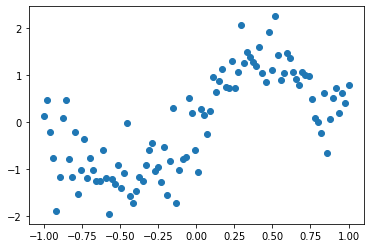

In [157]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Simple dataset
n_samples = 100
n_features = 1
noise = 10
X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set")
plt.scatter(X, y)
plt.show()

# Complex dataset
x = np.linspace(-1, 1, n_samples) # coordinates
noise_sample = np.random.normal(0,0.5,n_samples)
sine_wave = x + np.sin(4*x) + noise_sample
plt.plot(x, sine_wave, 'o');
plt.show()

Closed form solution


In [158]:
class LinearRegression(object):

    def fit(self, X, t):
        self.t = t
        self.w = np.linalg.pinv(X) @ t

    def predict(self, X):
        self.y = X @ self.w
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

def extract_polynomial_features(X, M):
    phi = np.array(list(map(lambda x: x ** range(M + 1), X)))
    return phi

Error for training MSE: 123.1458858454599
Error for training RMSE: 11.097111599216253
Error for testing MSE: 97.65422166071207
Error for testing RMSE: 9.882015060741006


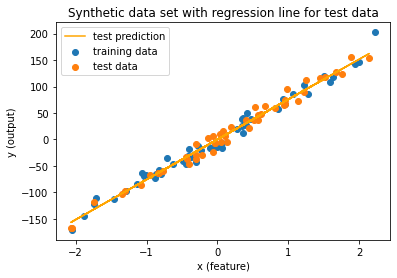

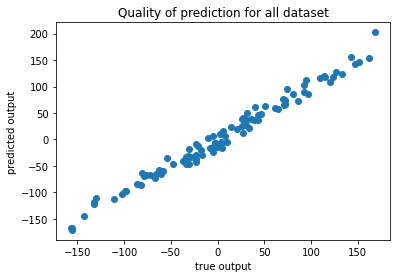

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')





plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(X, 1)
predict = model.predict(X_feat)
plt.scatter(predict, y)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Test closed form solution without poly features for complex data set

Error for training MSE: 0.5399298877620577
Error for training RMSE: 0.7347992159509003
Error for testing MSE: 0.8338343970439673
Error for testing RMSE: 0.8338343970439673


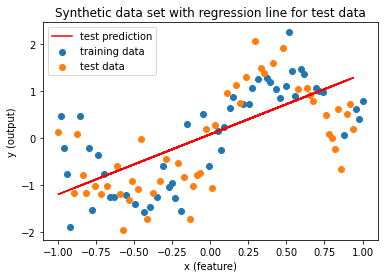

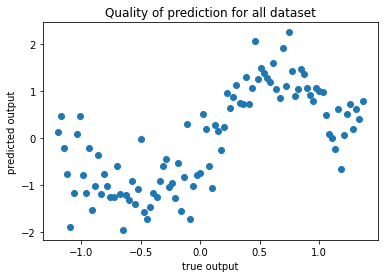

In [160]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "RMSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, 1)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Expand features to polynomial form to check for a better fit

Error for training MSE: 0.23084980403628022
Error for training RMSE: 0.480468317411544
Error for testing MSE: 0.2421423578034773
Error for testing RMSE: 0.4920796254707944


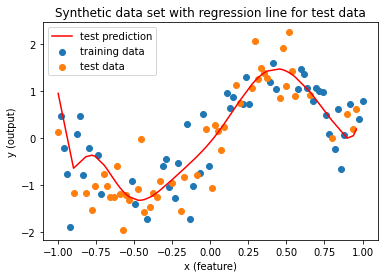

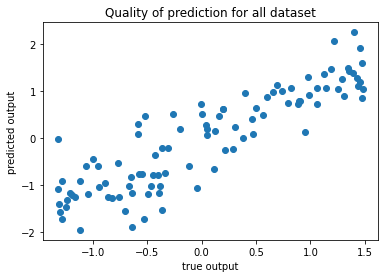

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)


M = 10 #@param {type: "slider", default: 8, min: 1, max: 50}
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
xt, yt = zip(*sorted(zip(X_test, predict_test)))
plt.plot(xt, yt, label="test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, M)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Gradient Descent


In [162]:
class LinearRegressionGD(object):

    def train(self, X, T, lr=-1, epochs_no=3, print_epochs=True, returnEpochAnalysys=False):
      print("---- TRAINING STARTED ----")
      (N, D) = X.shape
      X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
      if lr == -1:
        X_new = np.concatenate([X_hat, np.zeros((N, N - D - 1))], axis=1)
        lr = 1 / max(np.linalg.eigvals(np.transpose(X_new) @ X_new))
      self.W = np.random.randn((D+1))
      self.t = T
      Y = np.zeros(N + 1)
      epoch_analysys = np.zeros(epochs_no)
      for epoch in range(epochs_no):
        Y = X_hat @ self.W
        self.W = self.W - lr * self.get_gradient(Y, T, X_hat)
        if returnEpochAnalysys:
          epoch_analysys[epoch] = self.get_error(Y, T, "MSE")
        if print_epochs:
          print(f'EPOCH: {epoch} => Error: {self.get_error(Y, T, "MSE")}')
      print("---- TRAINING ENDED ----")
      if returnEpochAnalysys:
        return epoch_analysys

    def get_gradient(self, Y, T, X):
      return (sum((y - t) * x for (y, t, x) in zip(Y, T, X)))

    def predict(self, X):
        X_hat = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        self.y = X_hat @ self.W
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

    

Test Gradient Descent

Error for  CLOSED training MSE: 92.3659425628342
Error for  CLOSED training RMSE: 9.610720189602556
---- TRAINING STARTED ----
EPOCH: 0 => Error: 7169.244666395996
---- TRAINING ENDED ----


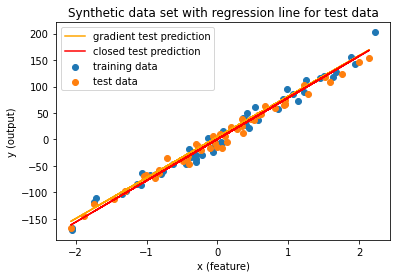

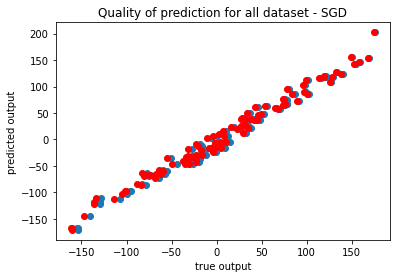

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)
predict_test = model.predict(X_test_feat)

print(f'Error for  CLOSED training MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for  CLOSED training RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

modelGD = LinearRegressionGD()
modelGD.train(X_train, y_train, epochs_no=1)

predict_train_GD = modelGD.predict(X_train)
predict_test_GD = modelGD.predict(X_test)


plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test_GD, label="gradient test prediction", color="orange")
plt.plot(X_test, predict_test, label="closed test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
plt.legend()
plt.show()


predictGD = modelGD.predict(X)
plt.scatter(predictGD, y, label="Gradient Decent")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset - SGD")

X_feat = extract_polynomial_features(X, 1)
predict = model.predict(X_feat)
plt.scatter(predict, y, color="red", label="Closed regression")
plt.show()




Test Gradient Descent for complex scenario

Error for  CLOSED training MSE: 0.3924582055407223
Error for  CLOSED training RMSE: 0.6264648478092943
---- TRAINING STARTED ----
EPOCH: 0 => Error: 11.934382491328966
EPOCH: 1 => Error: 1.0063957404607882
EPOCH: 2 => Error: 0.8757616040764958
EPOCH: 3 => Error: 0.8258075689665445
EPOCH: 4 => Error: 0.7877246715871564
EPOCH: 5 => Error: 0.7571193448895499
EPOCH: 6 => Error: 0.731510404068129
EPOCH: 7 => Error: 0.7093583289589858
EPOCH: 8 => Error: 0.6896938626024018
EPOCH: 9 => Error: 0.6718954370586632
EPOCH: 10 => Error: 0.6555548592349589
EPOCH: 11 => Error: 0.6403960835007788
EPOCH: 12 => Error: 0.6262259401380823
EPOCH: 13 => Error: 0.6129041180512084
EPOCH: 14 => Error: 0.6003247647035022
EPOCH: 15 => Error: 0.5884051094251377
EPOCH: 16 => Error: 0.5770783450584831
EPOCH: 17 => Error: 0.5662891021630801
EPOCH: 18 => Error: 0.5559905109201874
EPOCH: 19 => Error: 0.5461422434100534
EPOCH: 20 => Error: 0.5367091681881655
EPOCH: 21 => Error: 0.5276603932044803
EPOCH: 22 => Error: 0.5

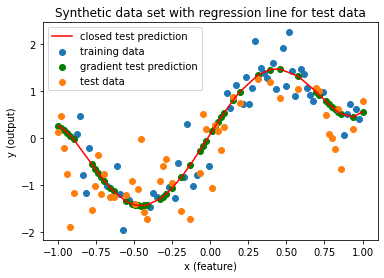

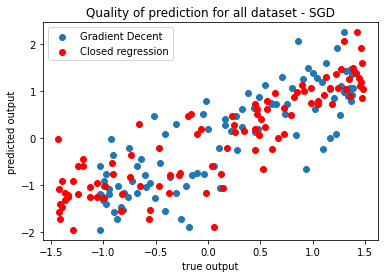

In [164]:
M = 5 #@param {type: "slider", default: 8, min: 1, max: 100}
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)
model = LinearRegression()
model.fit(X_train_feat, y_train)
predict_test = model.predict(X_test_feat)

print(f'Error for  CLOSED training MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for  CLOSED training RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

epochs_no = 100
modelGD = LinearRegressionGD()
modelGD.train(X_train_feat, y_train, epochs_no=epochs_no, lr=.01)

predict_train_GD = model.predict(X_train_feat)
predict_test_GD = model.predict(X_test_feat)


plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.scatter(X_test, predict_test_GD, label="gradient test prediction", color="green")
xt, yt = zip(*sorted(zip(X_test, predict_test)))
plt.plot(xt, yt, label="closed test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, M)
predictGD = modelGD.predict(X_feat)
plt.scatter(predictGD, sine_wave, label="Gradient Decent")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset - SGD")
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave, color="red", label="Closed regression")
plt.legend()
plt.show()

Compare different learning rates for Gradient Descent.

---- TRAINING STARTED ----
---- TRAINING ENDED ----
---- TRAINING STARTED ----
---- TRAINING ENDED ----
---- TRAINING STARTED ----
---- TRAINING ENDED ----
---- TRAINING STARTED ----
---- TRAINING ENDED ----


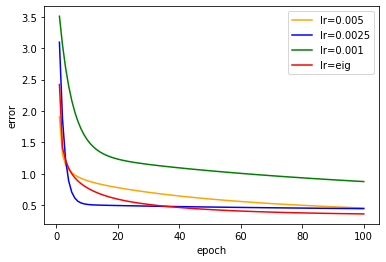

In [165]:
M = 5 #@param {type: "slider", default: 8, min: 1, max: 10}
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

#best_lr = 1 / np.linalg.eig(np.transpose(X_hat) @ X_hat)
learning_rates = [0.005, 0.0025, 0.001, -1]
colors = ['orange', 'blue', 'green', 'red']
epochs_no = 100
epochs = np.arange(1, epochs_no + 1, 1)
for (i, lr) in enumerate(learning_rates):
  modelGD = LinearRegressionGD()
  analysys = modelGD.train(X_train_feat, y_train, epochs_no=epochs_no, lr=lr, print_epochs=False, returnEpochAnalysys=True)
  plt.plot(epochs, analysys, label=f'lr={lr if lr != -1 else "eig"}', color=colors[i])

plt.xlabel("epoch")
plt.ylabel("error")
plt.legend()
plt.show()


Mini-Batch Gradient Descent
